In [1]:
    import pandas_datareader.data as web
    import pandas as pd
    import datetime
    import numpy as np
%matplotlib inline

In [2]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2016,7,7)

sym = 'AMXL.MX'
small_window = 21
large_window = 63

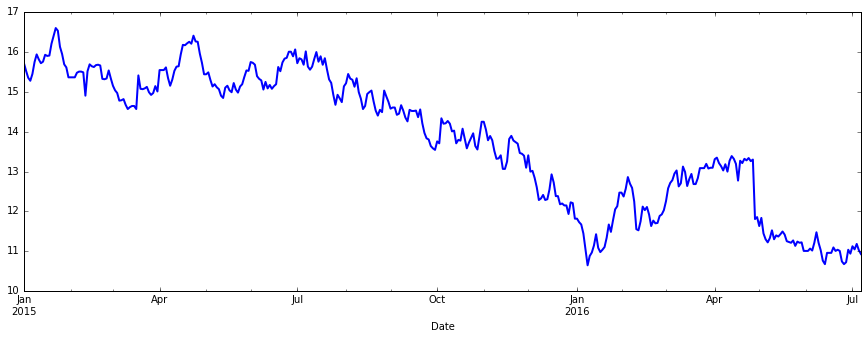

In [3]:
df = web.DataReader(sym, data_source='yahoo',start=start,end=end)
df['Adj Close'].plot(figsize=(15,5), linewidth=2)

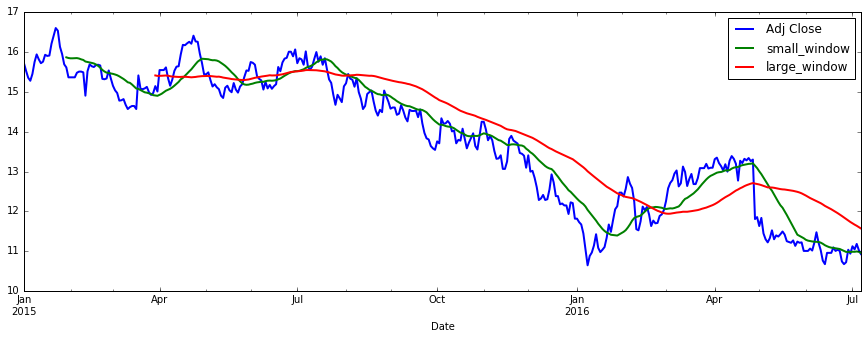

In [4]:
df['Market'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['small_window'] = pd.rolling_mean(df['Adj Close'],small_window)
df['large_window'] = pd.rolling_mean(df['Adj Close'],large_window)

df[['Adj Close','small_window','large_window']].plot(figsize=(15,5), linewidth=2)



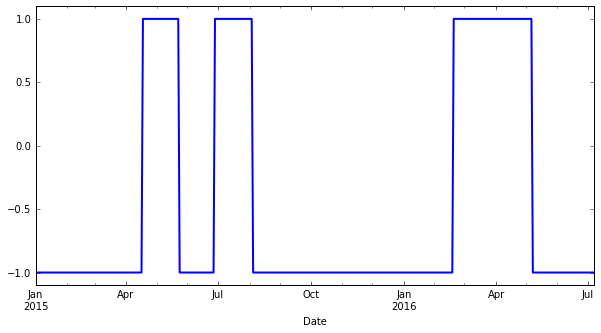

In [5]:
### Strategy
df['Regime'] = np.where(df['small_window']>df['large_window'],1,-1)

df['Regime'].plot(lw=1.5, ylim = [-1.1,1.1], figsize=(10,5), linewidth=2)

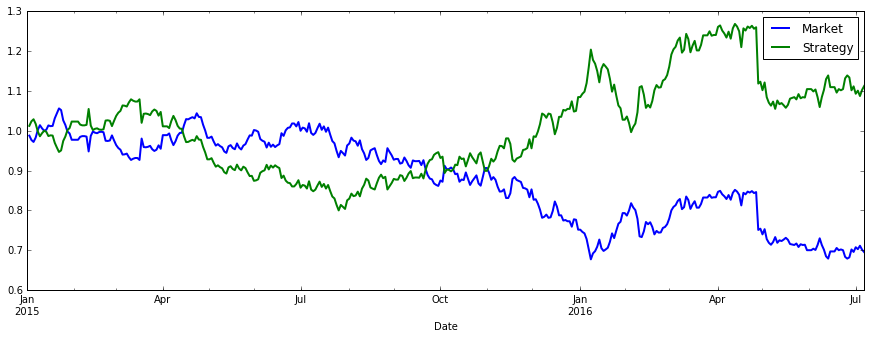

In [6]:

##################################################################
## Backtesting: How does this perform with respect to the market?
##################################################################

df['Strategy'] = df['Regime'].shift(1)*df['Market']
df[['Market','Strategy']].cumsum().apply(np.exp).plot(figsize=(15,5), linewidth=2)

In [7]:
df.tail()

,Open,High,Low,Close,Volume,Adj Close,Market,small_window,large_window,Regime,Strategy
Date,,,,,,,,,,,
2016-07-01,11.22,11.45,11.19,11.41,40897100,11.12752,0.016793,10.989590,11.703530,-1,-0.016793
2016-07-04,11.41,11.48,11.29,11.33,8597500,11.04950,-0.007036,10.988662,11.670402,-1,0.007036
2016-07-05,11.34,11.60,11.31,11.47,73871000,11.18603,0.012281,10.996557,11.641145,-1,-0.012281
2016-07-06,11.40,11.40,11.12,11.31,55493700,11.02999,-0.014048,10.987733,11.606934,-1,0.014048
2016-07-07,11.25,11.44,11.15,11.21,66089600,10.93247,-0.008881,10.961727,11.574117,-1,0.008881
